In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## LDA with extended data set to include other features than scores

In [2]:
class MF():
    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        #self.P = np.random.normal(size=(self.num_users, self.K))
       #self.Q = np.random.normal(size=(self.num_items, self.K))
        self.P = np.random.normal(scale=1.0/self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1.0/self.K, size=(self.num_items, self.K))

        #print()
        #print("matrix P")
       # print(self.P)
       # print()
       # print("matrix Q")
        #print(self.Q)
        #print()
         
        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        print()
        print("Overall Bias")
        print(self.b)
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
              for j in range(self.num_items)
                  if self.R[i, j] > 0]
        # Perform stochastic gradient descent for number of iterations
        # print(self.samples)
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            print()
            print("Training_process")
            print(training_process)
            if (i+1) % 10 == 0:
               print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        print()
        print("SSE = ")
        print(np.sqrt(error))
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            #print(prediction)
            e = (r - prediction)
            #print(e , r, prediction)
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Update user and item latent feature matrices
            #print("before update")
            #print(i , j)
            #print(self.P[i, :])
            #print(self.Q[j, :])
            #print()
            self.P[i, :] += (self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:]))
            self.Q[j, :] += (self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:]))
            #print("After update")
            #print(self.P[i, :])
           # print(self.Q[j, :])
           # print()

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        print(prediction , i, j)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [3]:
df_1  = pd.read_csv("SVD_Data_27.csv")
df_1.shape

(27, 17)

In [4]:
R=np.array(df_1 , dtype='long')
#A = np.array([10],dtype='int64')

In [5]:

mf = MF(R, K=7, alpha=0.1, beta=0.1, iterations=24)
training_process = mf.train()

print()
print("P x Q:")
print(mf.full_matrix())
print()
print("Global bias:")
print(mf.b)
print()
print("User bias:")
print(mf.b_u)
print()
print("Item bias:")
print(mf.b_i)
#print(R)



Overall Bias
4.89940828402
4.88753864643 3 1
4.92752212531 9 3
4.88018761542 13 6
4.97091053972 14 12
4.65967419179 11 6
4.91591040635 1 7
5.13216091373 1 14
5.09286423291 24 3
4.76095630116 3 9
4.89316401988 15 0
4.66236474906 9 12
4.8942300459 19 10
4.85147432704 10 16
5.28792902203 25 16
4.81218396431 22 1
4.6574375234 13 4
4.66318228757 9 0
4.89483856589 4 2
5.06986731348 1 11
5.18397612399 10 3
5.60954548124 9 16
4.90256211037 5 8
4.84625345494 0 0
5.04560517715 10 8
4.81148447447 23 14
5.19139590996 7 14
4.68199542832 15 4
4.3250036807 14 1
5.21776230484 25 6
5.94879179405 10 9
6.03556638803 10 14
4.38334934903 17 12
4.94738721053 26 5
5.12088937896 16 14
3.93340281056 19 12
5.32903428873 0 15
5.01894965365 7 6
5.42587203729 3 7
5.04678596354 15 8
4.87807374825 8 4
4.73210652458 15 14
5.1696992753 12 15
4.74303663432 24 15
4.95087439417 19 6
4.80094729757 20 15
4.80710434187 17 1
4.64804621306 19 4
4.99828559932 26 8
4.10343301704 15 12
5.23473163215 5 16
4.72326202648 26 1
5.55

1.97483025681 13 12
5.86152306018 23 9
5.70505197474 9 5
5.04737375992 11 6
3.64266766493 7 16
4.51668841089 19 4
4.16262470626 24 11
4.92040449293 24 14
6.0822822964 10 13
4.70706356073 3 3
4.42098057715 22 13
3.97845661022 19 15
4.65524372396 22 4
4.82447727152 24 4
5.39175844082 12 16
5.20907669788 7 14
9.92066296117 25 6
3.48178284753 19 16
4.81465698351 2 4
5.94147282533 11 9
6.28278864321 20 12
4.9119229994 0 10
5.20660418914 9 8
5.98516923107 3 14
5.51240801179 9 13
5.58369782054 12 5
5.40167575885 1 4
2.76254062313 14 16
8.18640648413 25 16
2.47474071497 15 10
7.26970822048 20 9
5.34964943549 9 2
5.16011512405 12 12
8.01870383625 10 12
8.24925333728 0 11
5.41044901654 3 4
4.48289286477 14 13
4.65525777044 24 2
4.52833742754 1 11
5.42840825148 17 4
3.3040921343 3 12
2.78877508558 21 16
3.07742748815 15 8
4.30107733964 24 15
5.4395043862 0 5
4.81920249284 24 8
4.90191972197 15 9
5.11248938692 12 3
4.30800642607 21 5
6.2182820271 20 11
4.12890768006 22 2
4.36676870539 24 7
5.23615

8.2465177088 10 7
8.31590219446 10 12
9.33489731949 0 8
3.73964834601 7 16
5.46870769028 12 4
4.94395260778 24 14
6.18437686346 3 14
5.68384339622 17 14
2.89584416334 26 11
8.33270573232 25 15
7.44537474596 0 11
3.34494323166 14 10
5.51033324035 17 1
1.41119089217 15 1
4.31653228992 1 15
4.14617947127 3 15
5.06946625717 24 8
6.24386750304 7 6
3.3897712651 11 0
3.27218340321 21 3
4.50937183095 9 1
8.20353502627 25 12
6.88523710874 23 14
5.55254516784 26 9
5.02053383672 11 11
4.39515767229 5 3
5.23222970141 19 9
5.4684470333 12 5
1.56656351872 15 0
4.69804340357 12 15
4.21201282115 11 10
6.19217153465 1 9
4.19811518665 2 16
5.29421831838 12 2
4.61853982717 13 5
3.67773713279 16 8
5.31158509225 9 8
5.44265917032 17 4
3.94734726474 21 6
6.00539007454 20 7
5.54962854441 9 7
5.9219310673 4 1
3.3531543915 22 15
1.73652111596 15 12
3.70239269598 22 0
4.57797587112 19 13
2.37130194489 14 16
4.22079350725 22 2
4.5359558656 1 5
3.92647342798 19 5
3.09903821717 23 12
5.86100560795 12 3
4.600894485

4.84852713678 13 13
1.66553725507 13 12
4.82062367918 12 11
5.00066163666 4 2
5.5612660692 3 4
4.13270032626 12 15
5.80363097855 9 3
5.10365131704 17 6
5.72520297637 5 4
5.25594506104 23 4
3.50122359851 9 12
3.26540222086 26 15
5.38943974711 22 14
4.33697469899 2 5
6.08218616905 9 2
8.92584540229 25 9
8.15964381418 25 12
5.23372738613 16 9
6.48081658191 0 14
3.20786017006 15 6
4.29556472139 24 16
5.35826874052 20 15
4.2905808549 5 8
3.84981529269 1 16
9.92536641475 0 6
4.70935896575 4 5
3.03826720199 15 3
3.54285933539 22 7
4.6448141099 21 5
4.27533371872 3 8
7.85953790928 10 11
2.24678423147 15 16
3.92188917651 7 11
5.92699374524 3 13
4.65015202168 22 4
5.86578339177 9 14
2.30965397646 15 0
4.06215267156 19 11
4.69913012063 0 10
4.13016960552 11 10
5.49723329227 23 5
2.181435973 15 10
5.57368588411 20 0
4.10636595031 14 13
3.01280975005 26 6
6.36046988428 20 16
4.33669018545 9 1
5.37129962098 7 9
4.83506870453 23 9
6.64570677665 0 1
3.37082569053 26 0
5.337756334 26 13
5.36657799601 1

9.35403207642 10 9
1.81131721957 26 16
5.09982060154 23 6
3.35749665498 19 12
7.0786212903 11 9
6.07069960397 12 8
7.860292699 25 14
7.79080706086 20 9
3.9461757128 17 12
8.50730642115 25 12
5.44842904897 12 5
4.10750636058 1 13
5.22347560112 8 4
3.46321430514 26 0
5.56253093987 11 13
2.92661536646 15 10
4.77042287224 26 13
5.69534207202 26 9
4.25501351303 3 0
5.0476971301 12 16
4.75958413971 4 5
5.34361581591 23 11
5.34483341418 26 5
5.50322662296 3 5
3.3375606445 15 2
2.70695579747 15 0
6.33403894316 1 9
2.51746760445 22 16
5.08966058991 5 16
7.62621648867 23 13
3.81981637179 3 11
5.09399553498 0 5
4.25992571503 19 5
5.4136559356 4 4
3.70211730195 14 15
1.68909416444 14 12
5.40649754096 0 13
4.38778756607 24 12
4.82557588739 16 13
2.36175137496 3 12
3.39745985877 16 0
4.44448977336 15 11
5.10759842152 24 7
4.87622333637 17 6
4.60393064707 11 6
5.84018181342 20 8
5.73748696608 4 0
3.84944597435 1 6
8.16696752451 0 12
8.43671996452 10 12
4.19721010886 11 15
2.80958279803 15 6
4.7281648

3.10602321658 11 3
4.46356272405 16 2
3.37577387913 3 16
6.25203906305 10 3
4.83258214114 5 15
4.40175627144 24 12
3.27981581931 16 7
6.19745699575 17 9
5.85180679956 17 1
5.42142085255 10 13
8.82115268299 0 12
4.44275429504 9 6
2.70881376154 11 1
6.87362965392 0 4
4.15023640907 24 15
5.4719207786 25 1
4.29487679431 9 15
3.31821784853 26 7
4.72973552393 2 4
3.13184474079 26 8
5.41751182722 26 5
2.75004178158 13 15
5.03340995331 19 6
5.06166987038 5 16
6.07372068216 20 14

SSE = 
7.73419217489

Training_process
[(0, 21.403272076799457), (1, 16.798678573491785), (2, 13.284085338911964), (3, 11.475164824511861), (4, 10.017888063282848), (5, 9.3329223521047151), (6, 8.5209780210490749), (7, 7.9608282066743614), (8, 7.7341921748947415)]
4.7657128539 14 5
4.02025395524 22 0
5.47899755039 3 5
3.55942532341 14 10
3.06420695505 22 16
6.46620539113 3 2
4.75409845432 13 4
5.84825194329 20 0
5.57498971375 16 14
5.07076809789 18 1
4.2569103865 3 7
7.14940283722 11 14
8.83761192093 25 6
4.6711370725

4.43749101983 13 4
7.44662240032 3 9
3.57698162882 1 16
5.93414871716 4 7
5.06821934396 8 1
2.51456547542 1 11
5.47057614973 5 15
4.86728484509 22 5
2.64899319463 22 6
5.33921411581 3 3
9.93211297853 0 8
3.51812369535 9 16
1.9979020346 22 12
3.09935043839 22 2
3.21552441831 26 1
4.78121340055 20 3
4.87087362412 12 12
4.20258011678 14 14
4.93432641543 14 9
3.37970419203 3 16
4.46435341799 14 5
1.91303274729 13 12
6.94078666478 12 6
3.39705076059 7 15
6.01139911315 0 13
8.5480544149 10 8
4.31924712636 22 4
6.57935146567 10 10
5.02993005941 17 6
2.74857511376 16 16
5.49937203968 10 1
5.2817879607 16 14
4.63332064316 5 2
4.40371380453 15 13
6.26121544219 0 14
5.70935572883 12 14
2.00457613033 23 10
6.2016575435 20 7
3.25181113054 26 0
4.23072987021 16 3
5.69100712181 14 1
4.65042315555 24 13
5.51604866179 9 7
7.3704040878 20 6
2.28138954239 1 12
2.05224909572 15 1
5.32521294879 12 4
5.30647235947 10 13
6.3882930629 0 3
5.17224212118 24 7
8.04968673797 25 15
5.04314471118 11 11
2.8113743267

9.88777983396 0 0
1.33838807342 14 12
5.56327151975 24 1
6.01835273229 1 9
3.00432138309 3 16
6.95080821922 5 1
5.95692429103 17 14
4.84907246664 13 5
8.82072113139 6 6
5.5005278437 25 1
6.33919652901 12 1
6.05186895987 26 14
5.52369262464 19 14
2.78475515442 11 1
7.1509600979 3 9
5.45256653214 2 14
3.97954025608 15 4
3.72139755636 1 13
5.40806818993 3 13
4.49475194892 11 15
2.89651010944 16 11
4.09530585225 9 1
4.02495165796 16 15
5.02792400478 12 3
3.32117715813 14 10
2.04119780886 14 11
5.00429135117 17 15
3.40432407187 11 7
7.57464536851 20 9
2.59676115661 7 1
5.79156765942 9 8
8.3818844858 10 16
4.67184189236 14 4
4.69618702569 24 13
4.70777700526 9 15
5.26307224571 26 5
4.5401983467 20 3
2.39595293072 15 12
6.47193324331 0 14
7.44459974248 11 9
2.90293689137 22 16
4.69501072289 11 6
6.57032468945 10 10
6.88222861358 10 15
5.50284063186 0 10
5.08779682514 24 4
4.44819289888 1 5
7.81617167049 23 13
2.25007350789 1 12
5.2692152531 7 13
6.06306288515 4 8
8.87649695296 10 0
3.13269810

4.12286725229 1 15
5.71878726094 9 7
4.70973545895 2 15
5.30032296141 26 9
3.22927098486 7 15
6.92295539142 1 1
4.01946663174 3 7
5.50735453138 24 1
6.27290093862 20 12
3.38116556282 14 10
4.64265318236 22 13
3.73266370234 17 10
2.17521295439 15 16
6.16799445832 7 9
6.29211841596 17 9
2.79241028666 13 15
5.44743115813 16 14
3.60062623928 9 16
8.46538655758 10 7
2.76032736621 1 12
5.64381366671 15 14
3.16656153245 26 7
4.46887001821 26 3
5.08940342954 24 0
3.7022587416 11 2
4.96284470774 12 3
5.33780910556 3 4
2.17639330219 15 12
7.922532354 10 11
4.9755105618 13 5
5.24615930668 8 1
8.14934111528 0 16
5.10362490959 11 10
2.24975326757 15 6
6.12487100964 3 6
2.95761914595 13 10
2.65381805285 16 16
5.84529923189 10 10
1.75026760573 13 12
5.68755882757 3 14
6.07935034163 20 7
5.27610393316 10 2
4.79814026408 12 10
1.57269004903 26 16
5.08469461208 24 7
5.99081085767 12 8
4.56824048721 7 14
3.97018808688 22 0
5.79268124541 10 1
7.64752930062 23 14
3.25681798368 19 16
3.51697778569 22 11
4.7

5.46973753565 26 5
3.13015786286 21 3
4.86955918246 16 4
4.05043540943 17 11
3.94001233318 19 15
3.79484142948 19 12
5.17332378082 12 16
5.29553852622 3 3
6.63298830387 1 0
7.49412245732 1 1
4.73548581089 12 12
4.81038994757 24 16
1.01214903738 23 1
9.5542974655 0 8
5.74359242176 4 1
8.98229422161 6 6
4.06530846027 9 1
7.26667300676 3 9
3.61950715515 7 12
4.7619368194 17 6
5.98723720148 5 1
3.57282216935 14 6
6.09208530233 12 8
2.36547331932 15 15
4.53889107634 16 6
2.96236243007 23 12
6.7435229197 1 7
6.27667992897 3 6
5.16588923582 24 0
9.14830293066 10 6
5.0628096708 18 1
4.33522327553 2 5
6.12190297007 3 14
1.76616044652 19 10
6.06771095458 12 2
4.24860833079 15 11
2.07855050505 22 12
5.03506004661 12 3
5.72802195494 9 2
5.23644657504 10 13
4.93588548276 1 10
2.31177705592 21 0
3.04360797332 11 3
3.08479677293 21 2
4.27604616639 24 5
5.57228635846 11 4
3.1566586437 26 8
4.05450796603 1 13
4.25498724283 5 7
8.67183956951 0 12
4.52378253567 26 3
3.31601285037 16 0
5.72515572856 17 4


3.82763776579 2 12
4.47245460826 24 12
2.40299253087 13 15
5.08411219347 17 13
4.07886230071 3 7
8.81006173523 25 9
7.77079299099 1 3
4.47375100112 2 15
2.40531481639 14 11
3.89141402739 21 1
3.39027461642 7 16
8.72902067225 6 6
8.26896424392 10 12
5.16905699989 24 0
3.94921820734 2 1
5.72120429075 12 14
5.13318270303 11 10
2.92897850018 3 11
3.64858420571 9 16
5.9865853555 7 9
4.84075452761 4 5
5.14032190008 25 1
2.53049384309 22 16
2.49474361896 21 7
8.30120569203 25 16
4.91783539882 6 1
5.04708206024 5 4
4.46454647606 16 2
3.2224974687 16 0
5.79569994815 12 1
3.54634243402 11 0
4.47168228104 2 13
2.83748008974 26 1
4.98908385878 1 10
7.34710715529 1 1
4.46045578881 13 4
5.70814676234 24 1
1.89015036881 13 12
4.02246149221 14 13
5.90815472279 12 8
4.640390271 9 15
5.0658066682 26 13
5.87852254149 12 2
4.6967079667 21 4
3.39396587826 11 8
4.49792156917 3 1
2.11715849934 15 16
3.50044991934 12 11
2.6988892021 15 2
3.89787168866 21 6
4.82452490735 5 5
4.66965225724 11 6
8.37669797381 25

3.31758104274 1 13
5.92108883398 9 2
6.07794330703 4 8
4.85699531353 1 5
2.9370056619 11 1
4.9708055488 13 14
3.43612869742 26 15
3.76248106586 24 2
7.36389485775 10 15
4.98116086906 11 11
4.18937372576 16 3
4.99847849651 4 5
3.13364323875 26 7
6.54667658586 3 2
6.04249342875 23 11
7.00645452748 0 1
6.06819273207 20 0
6.47411168529 0 14
5.1401202047 11 10
4.79445828589 26 4
7.16684623509 12 9
3.98022024007 5 7
3.80493012871 21 1
4.93922756352 7 14
3.98953119482 22 0
5.59140277431 2 9
7.66839593158 0 9
2.63861946525 15 7
9.71526227443 0 0
7.36780036665 1 3
2.32474141642 21 7
4.91723840173 14 4
4.27813168155 17 11
3.63813885269 11 0
5.04621278822 24 7
1.87518007617 13 12
5.36281893161 0 10
2.6307920884 2 10
5.12785955838 12 3
4.10847019267 22 1
4.90412250169 2 4
2.38238376106 14 11
3.76580806343 12 15
3.74416701439 24 3
4.75082022221 9 6
8.76806210414 25 15
1.90032114977 15 1
4.669898864 14 5
6.10436062796 26 14
2.21450091238 15 6
5.20524761481 2 6
4.57237944653 9 13
5.16889130996 26 5
6

4.85635796897 4 5
4.89192249989 11 10
3.77475877312 24 11
4.47549237227 16 3
4.09458050263 3 8
2.77681652987 15 0
5.49300677068 4 4
4.31748720543 9 1
4.19017710414 9 10
4.94999274963 9 15
5.84137998934 9 8
4.18467740556 14 13
5.17117590559 24 7
4.8735305992 14 4
4.72079555441 24 13
5.15468913508 6 1
5.89433497199 2 9
5.11263773872 10 13
3.23571871846 26 8
3.57982392726 14 15
4.83367080563 4 2
5.09765397131 18 1
4.32021122239 5 8
4.59473937326 3 1
3.67966930155 19 12
5.7041794738 12 14
8.3365823228 25 15
7.82903914463 10 16
5.34480765173 26 5
6.14091288763 20 12
2.98131655893 21 3
5.18335095644 24 14
2.77781506414 13 15
4.9935242596 26 4
5.20665117572 24 4
4.38905001966 5 2
6.0983628231 17 14
3.80527188816 24 15
7.92146359888 25 14
5.81267495535 12 1
2.12315670357 15 12
4.12578602729 2 12
4.02122799155 22 0
3.47047250341 1 16
5.63167739727 3 13
4.28340467111 5 0
3.92232065573 16 15
7.45298473671 0 9
6.9821806604 8 6
4.92258286084 13 14
4.90076223502 12 10
3.24068175439 26 0
4.0879762108

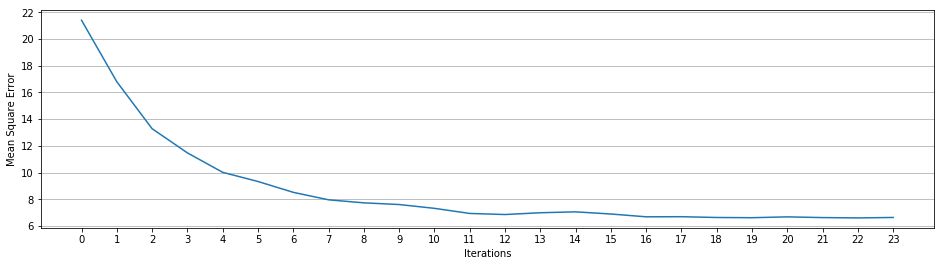

In [6]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")